- `.info()`
- `.describe()`
- `.value_counts()`
- removing unreliable data


### Getting to Know a Dataset

In [1]:
import pandas as pd

In [2]:
unemployment = pd.read_csv("../data/python_datasets/clean_unemployment.csv")
unemployment.head(5)

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [3]:
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [4]:
print(unemployment.describe())

             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.045439    5.902152 

Unemployment df contains 182 rows of country data including country_code, country_name, continent, and unemployment percentages from 2010 through 2021.

#### Categorical values

In [5]:
# Count the values associated with each continent in unemployment
print(unemployment['continent'].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


There are 23 countries in North America, which includes countries in the Caribbean and Central America? We notice that North America has 18 data points in the unemployment DataFrame, so we are missing information on a few of the countries from our dataset.

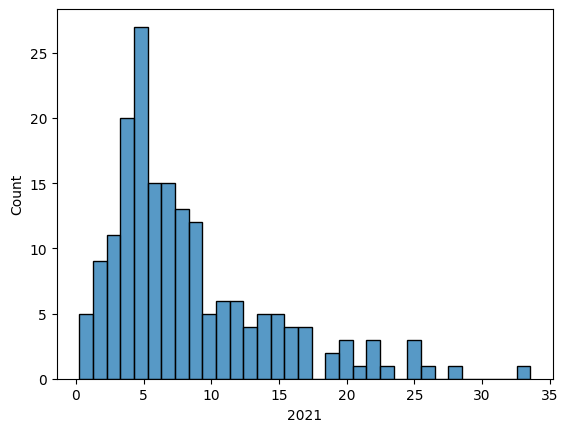

In [6]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x='2021', binwidth=1)
plt.show()

2021 unemployment hovered around 3% to 8% for most countries in the dataset, but a few countries experienced very high unemployment of 20% to 35%.

#### Validating continents

A colleague has informed us that the data on unemployment from countries in Oceania is not reliable, and we should identify and exclude these countries from the unemployment data. The `.isin()` function can help with that!

The task is to use `.isin()` to identify countries that are not in Oceania. These countries should return `True` while countries in Oceania should return `False`. This will set up to use the results of `.isin()` to quickly filter out Oceania countries using Boolean indexing.



In [7]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

#### Validating range
Now it's time to validate our numerical data. We saw that the largest unemployment rate during 2021 was nearly 34 percent, while the lowest was just above zero.

Let's get more detailed information about the range of unemployment data using Seaborn's boxplot, and we'll also visualize the range of unemployment rates in each continent to understand geographical range differences.

0.26 33.56


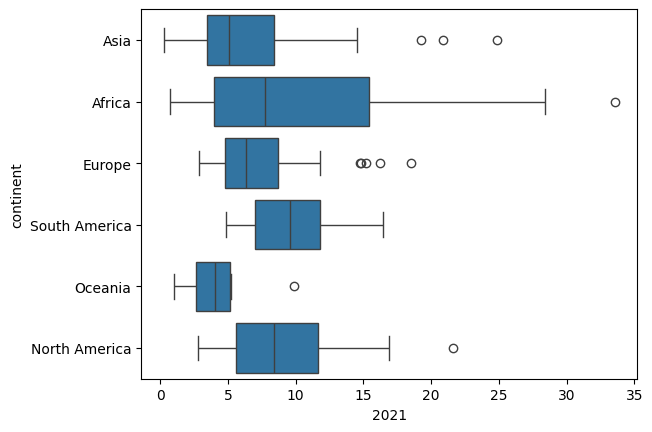

In [8]:
# Print the minimum and maximum unemployment rates during 2021
print(min(unemployment['2021']), max(unemployment['2021']))

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x='2021', y='continent')
plt.show()

How different the ranges in unemployment are between continents. For example, Africa's 50th percentile is lower than that of North America, but the range is much wider.

In [9]:
# Print yearly mean and standard deviation grouped by continent
unemployment.groupby('continent')[['2020', '2021']].agg(['mean', 'std'])

2020                 2021          
                    mean       std       mean       std
continent                                              
Africa         10.307736  7.928166  10.473585  8.131636
Asia            7.012340  5.699609   6.906170  5.414745
Europe          7.470513  4.071218   7.414872  3.947825
North America   9.297778  4.963045   9.155000  5.076482
Oceania         4.273750  2.617490   4.280000  2.671522
South America  10.275000  3.411263   9.924167  3.611624

In [10]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "std")
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


Average 2021 unemployment varied widely by continent, and so did the unemployment within those continents.

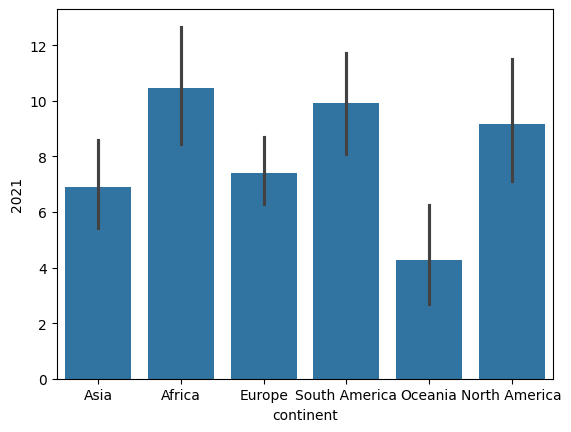

In [11]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data=unemployment, x='continent', y='2021')
plt.show()

While Europe has higher average unemployment than Asia, it also has a smaller confidence interval for that average, so the average value is more reliable.

### Data Cleaning and Imputation

**Handle missing data using different strategies depending on context**

- If missing values are ≤ 5%, it's usually safe to drop them.

- If more than 5%, consider imputing instead of dropping.

- Common imputation methods: mean, median, or mode.

- You can also impute within sub-groups (e.g., by continent or category) for better accuracy.

In [12]:
planes = pd.read_csv('../data/python_datasets/planes.csv')
planes.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


Handling missing values

In [13]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [14]:

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


**Strategies for remaining missing data**

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, we need to decide what to do with the `"Additional_Info"` and `"Price"` columns, which are missing 300 and 368 values respectively.

We'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

In [15]:
# Check the values of the Additional_Info column
print(planes['Additional_Info'].value_counts())

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


Clean up the "No info" vs "No Info" duplicates so they’re treated as the same

In [16]:
planes['Additional_Info'] = planes['Additional_Info'].str.lower().str.strip()

In [17]:
planes['Additional_Info'].value_counts(dropna=False)

Additional_Info
no info                         6401
in-flight meal not included     1525
NaN                              300
no check-in baggage included     258
1 long layover                    14
change airports                    7
business class                     1
red-eye flight                     1
2 long layover                     1
Name: count, dtype: int64

In [18]:
planes[planes['Additional_Info'].isna()]['Airline'].value_counts()

Airline
Jet Airways          118
Air India             53
IndiGo                47
Multiple carriers     28
SpiceJet              21
Vistara               14
Air Asia              12
GoAir                  7
Name: count, dtype: int64

To deal with the missing values in `"Additional_Info"` and `"Price"` column, we'll remove the `"Additional_Info"` column and impute the median by `"Airline"` for missing values of `"Price"`. We don't need the `"Additional_Info"` column, and should impute median "Price" by "Airline" to accurately represent the data!




In [19]:
planes.drop(columns='Additional_Info', inplace=True)

In [20]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [21]:
# Check for missing values
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


We converted a grouped DataFrame to a dictionary and then used it to conditionally fill missing values for `"Price"` based on the `"Airline"`

#### Converting and analyzing categorical data

**Finding the number of unique values**

To help identify which data could be reformatted to extract value, we'll find out which non-numeric columns in the planes dataset have a large number of unique values.

In [22]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for column in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {column} column: ", non_numeric[column].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


Interestingly, `"Duration"` is currently an object column whereas it should be a numeric column, and has 362 unique values!

In [23]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

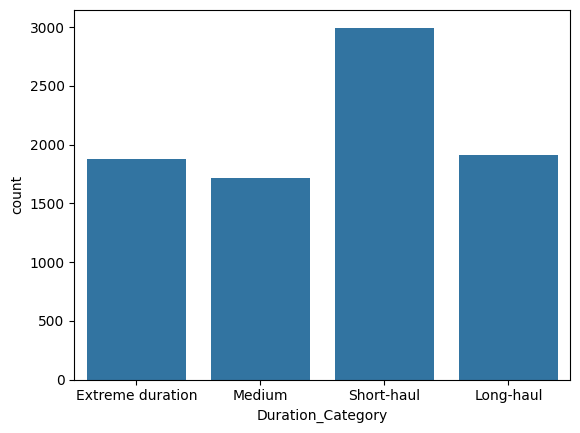

In [24]:
import numpy as np

# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

It's clear that the majority of flights are short-haul, and virtually none are longer than 16 hours

**Working with numeric data**

Let's analyze the duration of flights. Since the "Duration" column in the planes DataFrame currently contains string values, let's clean it up.

In [25]:
# Preview the column
print(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


In [26]:
# Remove the string character
planes["Duration"] = planes['Duration'].str.replace('h', '', regex=True).str.replace('m', '', regex=True)

In [27]:
# Step 2: Split into two parts
planes[['hours', 'minutes']] = planes['Duration'].str.split(' ', expand=True)

# Step 3: Fill missing minutes with 0
planes['minutes'] = planes['minutes'].fillna(0)

# Step 4: Convert to numeric
planes['hours'] = planes['hours'].astype(float)
planes['minutes'] = planes['minutes'].astype(float)

# Step 5: Calculate final duration in float hours
planes['Duration_float'] = planes['hours'] + (planes['minutes'] / 60)

print(planes[['Duration', 'Duration_float']])

      Duration  Duration_float
0           19       19.000000
1         5 25        5.416667
2         4 45        4.750000
3         2 25        2.416667
4        15 30       15.500000
...        ...             ...
10654     2 40        2.666667
10655     2 30        2.500000
10656     2 35        2.583333
10658     2 40        2.666667
10659     8 20        8.333333

[8508 rows x 2 columns]


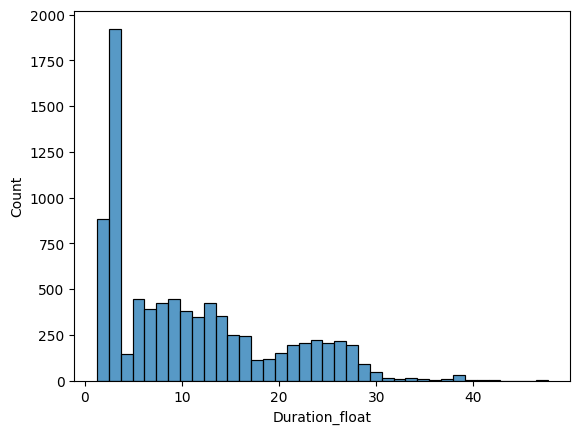

In [28]:
# Plot a histogram
sns.histplot(data=planes, x='Duration_float')
plt.show()

The most common flight length is around `three` hours.

**Adding descriptive statistics**

In [29]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


In [30]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration_float"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.333333                  3082
IndiGo             2.916667                   1632
Air India          15.500000                  1399
Multiple carriers  10.250000                   959
SpiceJet           2.500000                    653
Vistara            3.166667                    376
Air Asia           2.833333                    260
GoAir              2.916667                    147
Name: count, dtype: int64


In [31]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64


Looks like Jet Airways has the largest standard deviation in price, Air India has the largest median duration, and New Delhi, on average, is the most expensive destination. 

#### Handling outliers

An outlier is an observation that is far away from other data points. 

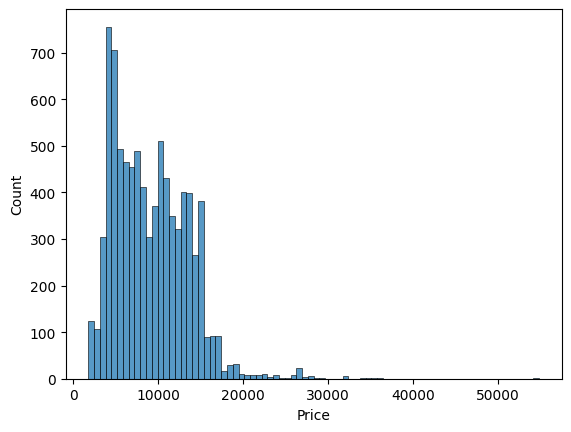

In [32]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x='Price')
plt.show()

In [35]:
# Display descriptive statistics for flight duration
print(planes['Price'].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


In [33]:
# Display descriptive statistics for flight duration
print(planes['Duration_float'].describe())

count    8508.000000
mean       10.730009
std         8.470214
min         1.250000
25%         2.833333
50%         8.666667
75%        15.500000
max        47.666667
Name: Duration_float, dtype: float64


In [34]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


Originally the dataset had a maximum price of almost 55000, but the output of planes.describe() shows the maximum has been reduced to around 23000, reflecting a less skewed distribution for analysis!

#### Relationships in Data

Variables in datasets don't exist in a vacuum; they have relationships with each other. Relationships exists across numerical, categorical, and even DateTime data, exploring the direction and strength of these relationships as well as ways to visualize them.

In [39]:
divorce = pd.read_csv('../data/python_datasets/divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


**Visualizing relationships over time**

We can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce?

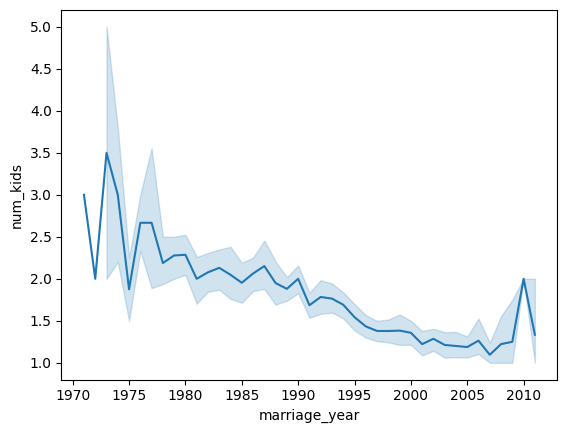

In [40]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()

It looks like couples who had later marriage years also had fewer children during their marriage.

#### Correlation

Correlation describes the direction of the relationship between two variables as well as its strength. Understanding this relationship can help us use variables to predict future outcomes. 

`.corr` calculates the Pearson correlation coefficient, measuring the linear relationship between two variables.

**Correlation in context**

However, this highlights an important point about correlations: we must always interpret them within the context of our data! 

The Pearson coefficient only shows linear relationships between variables. But sometimes, two variables can have a strong non-linear relationship and still have a Pearson score close to zero. Or, the correlation might show a strong linear relationship, even when something like a quadratic curve fits the data better. That’s why it’s important to use scatter plots alongside correlation calculations!

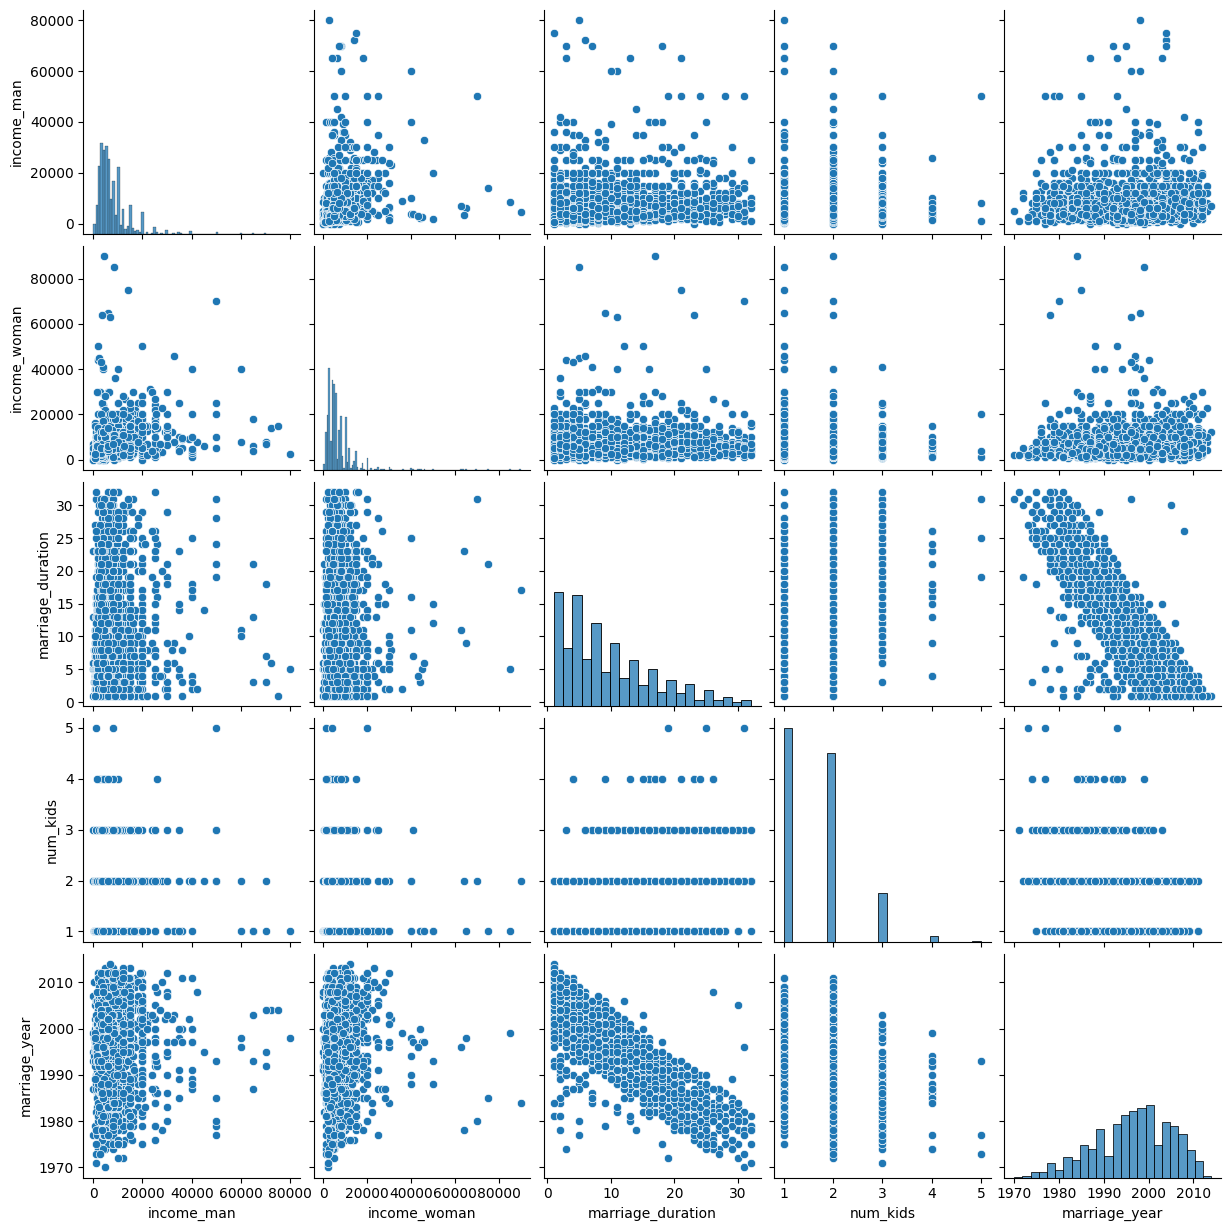

In [41]:
sns.pairplot(data=divorce)
plt.show()

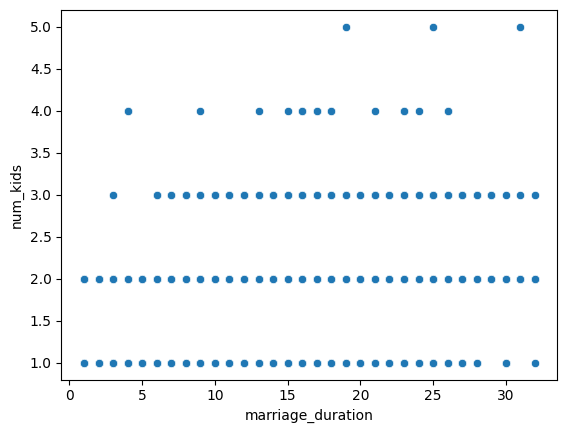

In [42]:
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids' )
plt.show()

There is a slight positive relationship in your scatterplot. In the dataset, couples with no children have no value in the `num_kids` column.

**Visualizing multiple variable relationships**

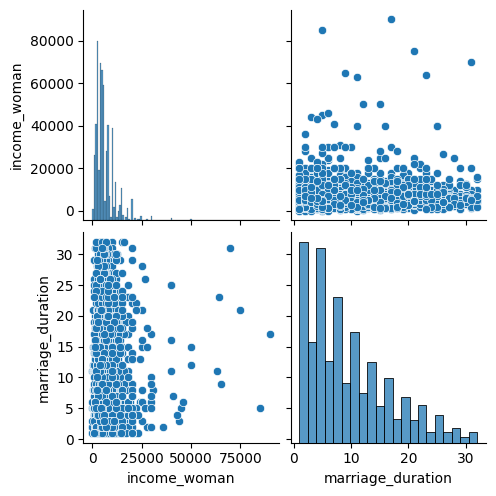

In [43]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman' , 'marriage_duration'])
plt.show()

In [47]:
divorce['education_woman'].value_counts()

education_woman
Professional    1433
Preparatory      456
Secondary        253
Primary           65
Other              2
Name: count, dtype: int64

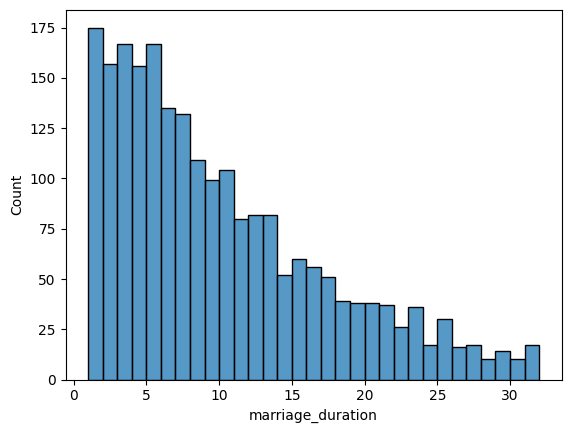

In [48]:
sns.histplot(data=divorce, x='marriage_duration', binwidth=1)
plt.show()

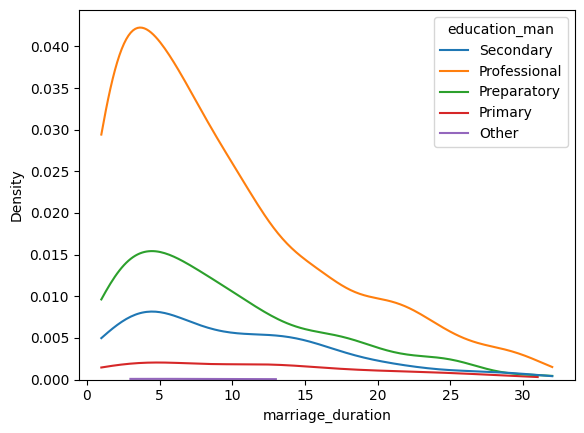

In [49]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man', cut=0)
plt.show()

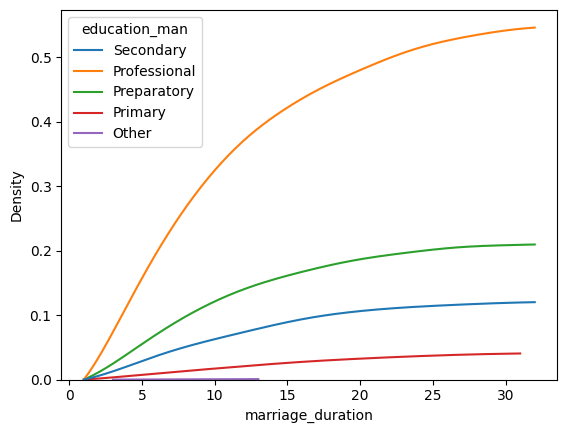

In [50]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man', cut=0, cumulative=True)
plt.show()

In [51]:
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year

**Relationship between marriage and education**

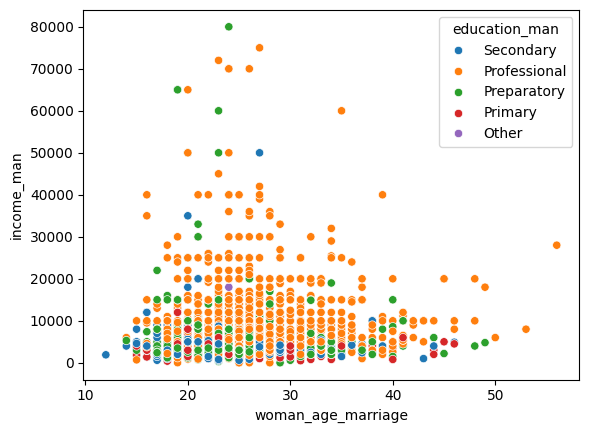

In [53]:
# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_man', hue='education_man')
plt.show()

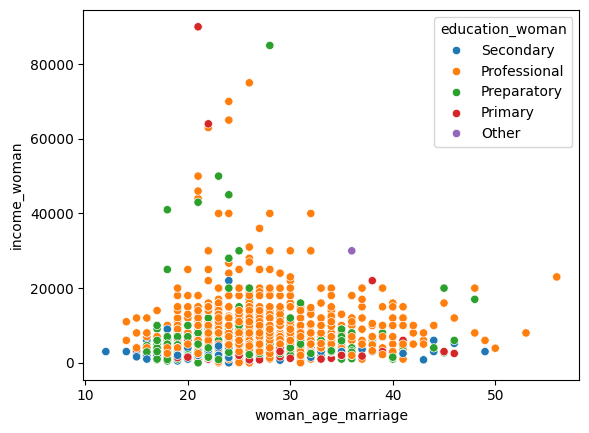

In [52]:
# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

There is a positive correlation between professional education and higher salaries, as you might expect. The relationship between women's age at marriage and education level is a little less clear.

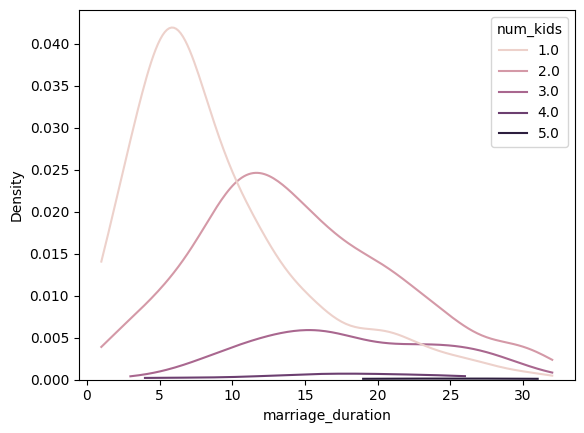

In [54]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids', cut=0)
plt.show()

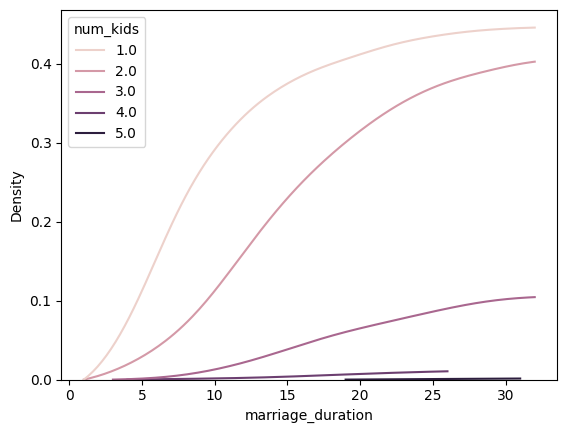

In [55]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

It looks as though there is a positive correlation between longer marriages and more children, but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more than two children; this helps us understand how reliable our findings are.

#### Considerations for categorical data

EDA is performed for a variety of reasons, like detecting patterns and relationships in data, generating questions or hypotheses, or to prepare data for machine learning models.

**1. Representative data**

No matter what we plan to do after EDA, one thing is essential — our data must accurately represent the population we're studying. For instance, if we want to explore the relationship between education level and income in the USA, we need to collect data from adults living in the USA. Using data from residents of France wouldn’t give us meaningful or valid insights for that analysis.

**2. Categorical classes and imbalance**

When working with categorical data (like labels or groups), it’s important to check how the classes are represented. For example, if we collect data about people's views on marriage and record their marital status — like single, married, or divorced — we need to look at how many people fall into each group.

Imagine during EDA we find that only 50 people are married, but 700 are divorced and 250 are single. Would that really reflect how the general public feels about marriage? Probably not! Divorced people might be more negative about marriage, and if they are overrepresented, it could skew the results. This situation is called class imbalance — when one category shows up way more than others — and it can mess with the conclusions we draw.

3. Class frequency

We use `value_counts()` in pandas to count how many times each category appears — like checking how many flights go to each destination in our planes dataset.

**Relative class frequency**

Now, if we want to see what percentage each category makes up, we can still use `value_counts()`, but set `normalize=True`. This gives us the relative frequency instead of just the count.
For example, if we know that 40% of internal flights in India usually go to Delhi, but in our dataset Delhi flights only make up about 11.82%, that tells us our dataset might not really represent the true population of flights in India.

In [57]:
planes['Destination'].value_counts(normalize=True)

Destination
Cochin       0.428893
Banglore     0.271391
Delhi        0.118274
New Delhi    0.079284
Hyderabad    0.065892
Kolkata      0.036265
Name: proportion, dtype: float64

#### Checking for class imbalance

In [58]:
salaries = pd.read_csv('../data/python_datasets/ds_salaries_clean.csv')
salaries.head(5)

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [59]:
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning", "Managerial", "Consultant"]

In [62]:
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

In [63]:
conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant)),

]

In [64]:
salaries["Job_Category"] = np.select(conditions, job_categories, default="Other" )

In [65]:
print(salaries[["Designation", "Job_Category"]].head())

                  Designation      Job_Category
0              Data Scientist      Data Science
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst    Data Analytics
4   Machine Learning Engineer  Machine Learning


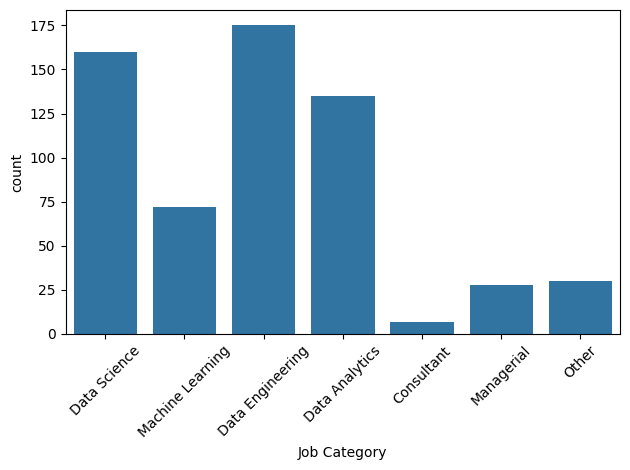

In [68]:
sns.countplot(data=salaries, x='Job_Category')
plt.xlabel('Job Category')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()       # Adjust layout to make everything fit nicely
plt.show()

**Relative frequency**

In [69]:
# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts(normalize=True))

Job_Category
Data Engineering    0.288303
Data Science        0.263591
Data Analytics      0.222405
Machine Learning    0.118616
Other               0.049423
Managerial          0.046129
Consultant          0.011532
Name: proportion, dtype: float64


It looks like Data Science is the most popular class and has a similar representation. Still, the other categories have quite different relative frequencies, which might not be surprising given the target audience is data scientists!

#### Cross-tabulation

Cross-tabulation can help identify how observations occur in combination.

In [71]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


In [72]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L    M   S
Job_Category                 
Consultant         3    1   3
Data Analytics    32   91  12
Data Engineering  54  107  14
Data Science      56   81  23
Machine Learning  25   25  22
Managerial        14   11   3
Other             14   10   6


In [73]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                  L              M             S
Job_Category                                                
Consultant         77553.000000    5449.000000  75296.333333
Data Analytics    102997.125000   98125.835165  43074.500000
Data Engineering  113829.888889  116668.971963  85645.285714
Data Science      107865.303571  121664.888889  70426.869565
Machine Learning  123878.520000  100849.480000  85124.954545
Managerial        170102.857143  160419.454545  98976.333333
Other              96392.928571   83067.000000  70195.166667


Looks like the largest mean salary is for Managerial data roles in large companies!

In [75]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
 8   Job_Category          607 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 42.8+ KB


In [76]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


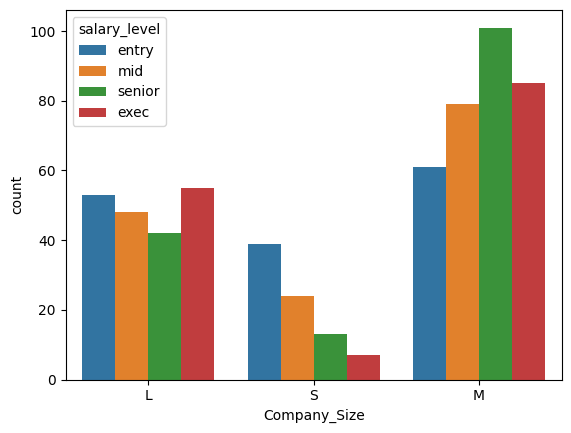

In [77]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

By using `pd.cut()` to split out numeric data into categories, you can see that a large proportion of workers at small companies get paid `"entry"` level salaries, while more staff at medium-sized companies are rewarded with `"senior"` level salary.

#### Hypotheses

To make conclusions regarding relationships, differences, and patterns in our data, we need to use a branch of statistics called Hypothesis Testing. This involves the following steps before we even start collecting data: 
- coming up with a hypothesis, or question
- specifying a statistical test that we will perform in order to reasonably conclude whether the hypothesis was true or false.

**Data snooping**

Imagine you work at an airline agency and you have this big planes dataset lying around — but no specific questions you want to answer yet. You might think, "Hey, since we have all this data, let's just explore it and run some tests!"
But here's the problem:

The data wasn’t collected to answer any particular question.

You've already spent a lot of time looking at it and creating new features, so you might (without realizing) come up with questions just to confirm things you think are true.

Plus, because you have so much data, it’s tempting to run tons of tests.

When you keep exploring, generating random hypotheses, and running lots of tests just to find something "interesting," it's called data snooping (or p-hacking).
And the truth is, if you run enough tests, you’ll eventually find something that looks significant — even if it’s just random luck.



**Generating hypotheses**

We generate hypotheses by doing some EDA.
For example:

If we think Jet Airways flights are longer than SpiceJet’s, we can create a bar plot of mean flight durations.

If we suspect flights to New Delhi are pricier, we can plot and check average prices by destination.

Once we spot a pattern, the next step is designing an experiment — like choosing a sample size and selecting a statistical test.
EDA mainly helps us spot patterns, ask better questions, and understand data limits.

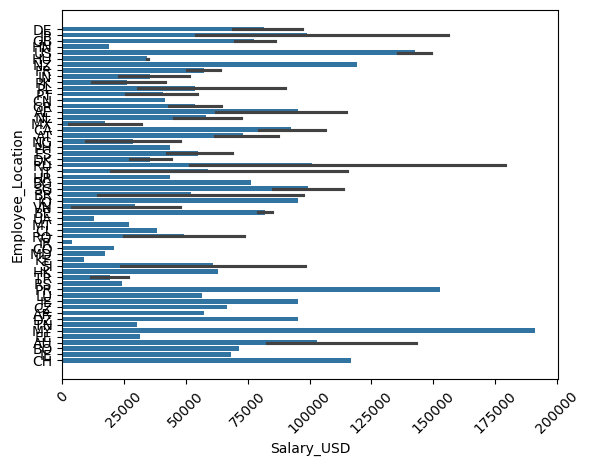

In [ ]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=salaries, x="Salary_USD", y="Employee_Location")
plt.xticks(rotation=45)
plt.show()